In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv(r'C:\Users\my pc\data_1.csv')

In [3]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
budget,0,0,4000000,21000000,42000
genres,"['Drama', 'Crime', 'Comedy']","['Drama', 'Comedy']","['Crime', 'Comedy']","['Action', 'Thriller', 'Crime']",['Documentary']
id,2,3,5,6,8
imdb_id,tt0094675,tt0092149,tt0113101,tt0107286,tt0825671
original_language,fi,fi,en,en,en
original_title,Ariel,Varjoja paratiisissa,Four Rooms,Judgment Night,Life in Loops (A Megacities RMX)
overview,Taisto Kasurinen is a Finnish coal miner whose...,"An episode in the life of Nikander, a garbage ...",It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...
popularity,6.656,6.205,8.307,6.944,1.652


# SENTIMENT ANALYSIS USING VADER:¶
    
    

In [4]:
data['overview'].isnull().sum()

113366

In [5]:
sentiment_score=[]
for i in range(656075):
        sentiment_score.append(0)
    

In [6]:
data['sentiment_score']=sentiment_score

In [7]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
budget,0,0,4000000,21000000,42000
genres,"['Drama', 'Crime', 'Comedy']","['Drama', 'Comedy']","['Crime', 'Comedy']","['Action', 'Thriller', 'Crime']",['Documentary']
id,2,3,5,6,8
imdb_id,tt0094675,tt0092149,tt0113101,tt0107286,tt0825671
original_language,fi,fi,en,en,en
original_title,Ariel,Varjoja paratiisissa,Four Rooms,Judgment Night,Life in Loops (A Megacities RMX)
overview,Taisto Kasurinen is a Finnish coal miner whose...,"An episode in the life of Nikander, a garbage ...",It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...
popularity,6.656,6.205,8.307,6.944,1.652


AFTER FILL ZERO(0) FOR NULL VALUES OVERVIEW CONTAINS NO NULL VALUE

In [8]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


'C:\Users\my' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_score = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\my
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
all_scores = []
for txt in data['overview']:
    try:
        score = sentiment_score.polarity_scores(txt)['compound']
       
    except:
        score = 0
       
    all_scores = all_scores + [score]
   
   
data['sentiment_score'] = all_scores

In [11]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
budget,0,0,4000000,21000000,42000
genres,"['Drama', 'Crime', 'Comedy']","['Drama', 'Comedy']","['Crime', 'Comedy']","['Action', 'Thriller', 'Crime']",['Documentary']
id,2,3,5,6,8
imdb_id,tt0094675,tt0092149,tt0113101,tt0107286,tt0825671
original_language,fi,fi,en,en,en
original_title,Ariel,Varjoja paratiisissa,Four Rooms,Judgment Night,Life in Loops (A Megacities RMX)
overview,Taisto Kasurinen is a Finnish coal miner whose...,"An episode in the life of Nikander, a garbage ...",It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...
popularity,6.656,6.205,8.307,6.944,1.652


# ENCODING

 ENCODING FOR 'STATUS' , 'VIDEO', 'PRODUCTION_COUNTRIES'

In [12]:
from sklearn import preprocessing

# FREQUENCY ENCODING FOR VIDEO 

In [13]:
data['video'].value_counts(normalize=True)

False    0.946252
True     0.053748
Name: video, dtype: float64

In [14]:
data['VIDEO FE'] = data['video'].map(data['video'].value_counts(normalize=True))


# FREQUENCY ENCODING FOR STATUS

In [15]:
data['status'].value_counts(normalize=True)

Released           0.988579
In Production      0.004143
Planned            0.003884
Post Production    0.002883
Rumored            0.000274
Canceled           0.000236
Name: status, dtype: float64

In [16]:
data['STATUS FE']=data['status'].map(data['status'].value_counts(normalize=True))

# FREQUENCY ENCODING FOR ORIGINAL_LANGUAGE

In [17]:
data['original_language'].value_counts(normalize=True)

en    0.562853
fr    0.060496
de    0.057440
es    0.050577
ja    0.034101
        ...   
ts    0.000002
nv    0.000002
av    0.000002
tt    0.000002
gv    0.000002
Name: original_language, Length: 166, dtype: float64

In [18]:
data['LANGUAGE FE']=data['original_language'].map(data['original_language'].value_counts(normalize=True))

In [19]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
budget,0,0,4000000,21000000,42000
genres,"['Drama', 'Crime', 'Comedy']","['Drama', 'Comedy']","['Crime', 'Comedy']","['Action', 'Thriller', 'Crime']",['Documentary']
id,2,3,5,6,8
imdb_id,tt0094675,tt0092149,tt0113101,tt0107286,tt0825671
original_language,fi,fi,en,en,en
original_title,Ariel,Varjoja paratiisissa,Four Rooms,Judgment Night,Life in Loops (A Megacities RMX)
overview,Taisto Kasurinen is a Finnish coal miner whose...,"An episode in the life of Nikander, a garbage ...",It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...
popularity,6.656,6.205,8.307,6.944,1.652


# RELEASE YEAR MINUS CURRENT YEAR

In [20]:
release_year=data['release_year']

In [21]:
release_year_1=[]
for i in release_year:
    x=2021-i
    release_year_1.append(x)
    

In [22]:
data['release_year_minus_current_year']=release_year_1

In [23]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
budget,0,0,4000000,21000000,42000
genres,"['Drama', 'Crime', 'Comedy']","['Drama', 'Comedy']","['Crime', 'Comedy']","['Action', 'Thriller', 'Crime']",['Documentary']
id,2,3,5,6,8
imdb_id,tt0094675,tt0092149,tt0113101,tt0107286,tt0825671
original_language,fi,fi,en,en,en
original_title,Ariel,Varjoja paratiisissa,Four Rooms,Judgment Night,Life in Loops (A Megacities RMX)
overview,Taisto Kasurinen is a Finnish coal miner whose...,"An episode in the life of Nikander, a garbage ...",It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...
popularity,6.656,6.205,8.307,6.944,1.652


In [24]:
data=data.drop(['Unnamed: 0'],axis=1)
data=data.drop(['Unnamed: 0.1'],axis=1)

In [25]:
data=data.drop(['id'],axis=1)
data=data.drop(['imdb_id'],axis=1)

In [26]:
data.head().T

,0,1,2,3,4
budget,0,0,4000000,21000000,42000
genres,"['Drama', 'Crime', 'Comedy']","['Drama', 'Comedy']","['Crime', 'Comedy']","['Action', 'Thriller', 'Crime']",['Documentary']
original_language,fi,fi,en,en,en
original_title,Ariel,Varjoja paratiisissa,Four Rooms,Judgment Night,Life in Loops (A Megacities RMX)
overview,Taisto Kasurinen is a Finnish coal miner whose...,"An episode in the life of Nikander, a garbage ...",It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...
popularity,6.656,6.205,8.307,6.944,1.652
production_companies,['Villealfa Filmproductions'],['Villealfa Filmproductions'],"['Miramax', 'A Band Apart']","['Universal Pictures', 'Largo Entertainment', ...",['inLoops']
production_countries,['Finland'],['Finland'],['United States of America'],"['Japan', 'United States of America']",['Austria']
revenue,0,0,4.25735e+06,1.21369e+07,0
runtime,73,74,98,110,80


In [27]:
data['popularity'] = pd.to_numeric(data['popularity'].astype(str).str[:-1], errors='coerce')


In [28]:
data['popularity']

0         6.65
1         6.20
2         8.30
3         6.94
4         1.65
          ... 
656070     NaN
656071     NaN
656072     NaN
656073     NaN
656074     NaN
Name: popularity, Length: 656075, dtype: float64

# CATEGORICAL COLUMNS

In [29]:
data_cat=data.select_dtypes(object)
data_cat.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'overview',
       'production_companies', 'production_countries', 'spoken_languages',
       'status', 'title', 'video'],
      dtype='object')

# NUMERICAL COLUMNS

In [30]:
data_num=data.select_dtypes(np.number)
data_num.columns

Index(['popularity', 'revenue', 'runtime', 'vote_average', 'vote_count',
       'release_year', 'release_month', 'release_day', 'count_genres',
       'count_company', 'count_spoken', 'count_country', 'sentiment_score',
       'VIDEO FE', 'STATUS FE', 'LANGUAGE FE',
       'release_year_minus_current_year'],
      dtype='object')

In [31]:
data_num.head().T

,0,1,2,3,4
popularity,6.650000,6.200000,8.300000e+00,6.940000e+00,1.650000
revenue,0.000000,0.000000,4.257354e+06,1.213694e+07,0.000000
runtime,73.000000,74.000000,9.800000e+01,1.100000e+02,80.000000
vote_average,6.800000,7.200000,5.700000e+00,6.400000e+00,7.400000
vote_count,134.000000,132.000000,1.936000e+03,1.910000e+02,14.000000
release_year,1988.000000,1986.000000,1.995000e+03,1.993000e+03,2006.000000
release_month,10.000000,10.000000,9.000000e+00,1.000000e+01,1.000000
release_day,21.000000,17.000000,1.200000e+01,1.500000e+01,1.000000
count_genres,3.000000,2.000000,2.000000e+00,3.000000e+00,1.000000
count_company,1.000000,1.000000,2.000000e+00,3.000000e+00,1.000000


In [32]:
data_num=data_num.drop(['revenue'],axis=1)


In [33]:
data_num=data_num.drop(['release_year'],axis=1)
data_num=data_num.drop(['release_month'],axis=1)
data_num=data_num.drop(['release_day'],axis=1)


In [34]:
data_num

,popularity,runtime,vote_average,vote_count,count_genres,count_company,count_spoken,count_country,sentiment_score,VIDEO FE,STATUS FE,LANGUAGE FE,release_year_minus_current_year
0,6.65,73.0,6.8,134.0,3,1,2,1,-0.6479,0.946252,0.988579,0.003162,33.0
1,6.20,74.0,7.2,132.0,2,1,3,1,-0.5994,0.946252,0.988579,0.003162,35.0
2,8.30,98.0,5.7,1936.0,2,2,1,1,-0.2960,0.946252,0.988579,0.562853,26.0
3,6.94,110.0,6.4,191.0,3,3,1,2,-0.9403,0.946252,0.988579,0.562853,28.0
4,1.65,80.0,7.4,14.0,1,1,5,1,0.9552,0.946252,0.988579,0.562853,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656070,NaN,2.0,0.0,0.0,0,0,0,0,0.0000,0.946252,0.988579,0.562853,NaN
656071,NaN,105.0,0.0,0.0,0,0,0,0,0.0258,0.946252,0.988579,0.562853,NaN
656072,NaN,120.0,0.0,0.0,0,0,0,0,0.9143,0.946252,0.988579,0.562853,NaN
656073,NaN,95.0,0.0,0.0,0,0,0,0,-0.7184,0.946252,0.988579,0.562853,NaN


# CREATING BASE LINE MODEL 

In [35]:
data_num

,popularity,runtime,vote_average,vote_count,count_genres,count_company,count_spoken,count_country,sentiment_score,VIDEO FE,STATUS FE,LANGUAGE FE,release_year_minus_current_year
0,6.65,73.0,6.8,134.0,3,1,2,1,-0.6479,0.946252,0.988579,0.003162,33.0
1,6.20,74.0,7.2,132.0,2,1,3,1,-0.5994,0.946252,0.988579,0.003162,35.0
2,8.30,98.0,5.7,1936.0,2,2,1,1,-0.2960,0.946252,0.988579,0.562853,26.0
3,6.94,110.0,6.4,191.0,3,3,1,2,-0.9403,0.946252,0.988579,0.562853,28.0
4,1.65,80.0,7.4,14.0,1,1,5,1,0.9552,0.946252,0.988579,0.562853,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656070,NaN,2.0,0.0,0.0,0,0,0,0,0.0000,0.946252,0.988579,0.562853,NaN
656071,NaN,105.0,0.0,0.0,0,0,0,0,0.0258,0.946252,0.988579,0.562853,NaN
656072,NaN,120.0,0.0,0.0,0,0,0,0,0.9143,0.946252,0.988579,0.562853,NaN
656073,NaN,95.0,0.0,0.0,0,0,0,0,-0.7184,0.946252,0.988579,0.562853,NaN


In [73]:
data_num.to_csv('data_base.csv')

In [72]:
data_num.to_csv('data_base.csv')

In [71]:
data_num.head()

,popularity,runtime,vote_average,vote_count,count_genres,count_company,count_spoken,count_country,sentiment_score,VIDEO FE,STATUS FE,LANGUAGE FE,release_year_minus_current_year
0,6.65,73.0,6.8,134.0,3,1,2,1,-0.6479,0.946252,0.988579,0.003162,33.0
1,6.20,74.0,7.2,132.0,2,1,3,1,-0.5994,0.946252,0.988579,0.003162,35.0
2,8.30,98.0,5.7,1936.0,2,2,1,1,-0.2960,0.946252,0.988579,0.562853,26.0
3,6.94,110.0,6.4,191.0,3,3,1,2,-0.9403,0.946252,0.988579,0.562853,28.0
4,1.65,80.0,7.4,14.0,1,1,5,1,0.9552,0.946252,0.988579,0.562853,15.0


In [36]:
data_num['popularity']=data_num['popularity'].fillna(data_num['popularity'].mean()) #fill mean in null place
data_num['runtime']=data_num['runtime'].fillna(data_num['runtime'].mean()) 
data_num['vote_average']=data_num['vote_average'].fillna(data_num['vote_average'].mean()) 
data_num['vote_count']=data_num['vote_count'].fillna(data_num['vote_count'].mean()) 
data_num['VIDEO FE']=data_num['VIDEO FE'].fillna(data_num['VIDEO FE'].mean()) 
data_num['STATUS FE']=data_num['STATUS FE'].fillna(data_num['STATUS FE'].mean()) 
data_num['LANGUAGE FE']=data_num['LANGUAGE FE'].fillna(data_num['LANGUAGE FE'].mean()) 
data_num['release_year_minus_current_year']=data_num['release_year_minus_current_year'].fillna(data_num['release_year_minus_current_year'].mean())

In [37]:
data_num.isnull().sum()/len(data_num)*100

popularity                         0.0
runtime                            0.0
vote_average                       0.0
vote_count                         0.0
count_genres                       0.0
count_company                      0.0
count_spoken                       0.0
count_country                      0.0
sentiment_score                    0.0
VIDEO FE                           0.0
STATUS FE                          0.0
LANGUAGE FE                        0.0
release_year_minus_current_year    0.0
dtype: float64

In [61]:
X=data_num.drop(['vote_average'],axis=1)
y=data_num['vote_average']   

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [63]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
print('X_test :',X_test.shape)
print('y_test :',y_test.shape)

X_train : (459252, 12)
y_train : (459252,)
X_test : (196823, 12)
y_test : (196823,)


In [60]:
data_num.describe()

,popularity,runtime,vote_average,vote_count,count_genres,count_company,count_spoken,count_country,sentiment_score,VIDEO FE,STATUS FE,LANGUAGE FE,release_year_minus_current_year
count,656075.000000,6.560750e+05,656075.000000,656075.000000,656075.000000,656075.000000,656075.000000,656075.000000,656075.000000,656075.000000,656075.000000,656075.000000,656075.000000
mean,0.751314,2.298242e+02,2.390250,24.031948,0.984791,0.673883,0.672306,0.667677,0.045641,0.898281,0.977329,0.330229,25.594724
std,9.953381,8.790516e+04,3.166242,333.530268,1.002209,1.048212,0.655440,0.650068,0.535421,0.200228,0.104119,0.263394,25.620735
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997600,0.053748,0.000236,0.000002,-9.000000
25%,0.000000,9.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.296000,0.946252,0.988579,0.034101,7.000000
50%,0.000000,7.500000e+01,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.946252,0.988579,0.562853,17.000000
75%,0.640000,1.020000e+02,5.500000,2.000000,1.000000,1.000000,1.000000,1.000000,0.476700,0.946252,0.988579,0.562853,35.000000
max,4547.440000,5.050505e+07,10.000000,29038.000000,13.000000,29.000000,25.000000,30.000000,0.999100,0.946252,0.988579,0.562853,147.000000


In [41]:
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                 1.164e+04
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:54:41   Log-Likelihood:            -1.6238e+06
No. Observations:              656075   AIC:                         3.248e+06
Df Residuals:                  656062   BIC:                         3.248e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.8810      0.038    -49.130      0.000      -1.956      -1.806
popularity                          0.0093      0.000     25.560      0.000       0.009       0.010
runtime                         -1.803e-08   4.04e-08     -0.446      0.655   -9.72e-08    6.11e-08
vote_count                          0.0002    1.1e-05     22.174      0.000       0.000       0.000
count_genres                        0.7018      0.004    174.349      0.000       0.694       0.710
count_company                       0.3503      0.004     85.296      0.000       0.342       0.358
count_spoken                        0.7947      0.006    122.300      0.000       0.782       0.807
count_country                       0.1745      0.007     25.179      0.000       0.161       0.188
sentiment_score                     0.0078      0.007      1.163      0.245      -0.005       0.021
VIDEO FE                           -0.2460      0.018    -13.686      0.000      -0.281      -0.211
STATUS FE                           2.7629      0.034     80.868      0.000       2.696       2.830
LANGUAGE FE                         0.4918      0.014     35.310      0.000       0.465       0.519
release_year_minus_current_year     0.0015      0.000     10.707      0.000       0.001       0.002
==============================================================================
Omnibus:                    59688.792   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77713.913
Skew:                           0.841   Prob(JB):                         0.00
Kurtosis:                       3.107   Cond. No.                     1.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#LINEAR REGRESSION

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
reg_predictions=lin_reg.predict(X_test)


In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, reg_predictions))
print(rms)


2.8733174384558984


In [80]:
reg_predictions

array([2.89185643, 0.92356902, 1.43444209, ..., 4.13555062, 0.95925197,
       1.07200661])

In [89]:
X_test.shape

(196823, 12)

In [90]:
y_test.shape

(196823,)

ValueError: x and y must be the same size

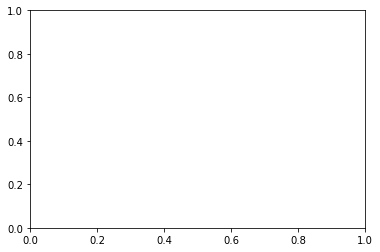

In [96]:
plt.scatter(X_test,y_test,color ='b')

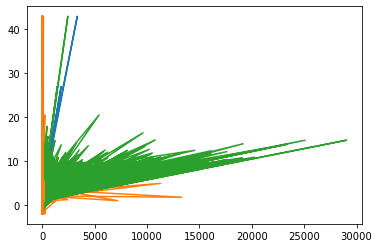

In [97]:

plt.plot(X_test,reg_predictions)
plt.show()

In [87]:
from sklearn import tree


In [88]:
clf= tree.DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)
clf.predict(X_test)

array([ 5.5,  0. ,  0. , ...,  1. ,  2. , 10. ])

In [99]:
from sklearn import svm

In [ ]:
regr = svm.SVR()
regr.fit(X_train,y_train)
SVR()
regr.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
